In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load the Dataset
sp = pd.read_csv("reliance_cleaned.csv")

In [36]:
# Create previous day features using .shift(1)
sp['Prev_Close'] = sp['Close'].shift(1)
sp['Prev_Open'] = sp['Open'].shift(1)
sp['Prev_High'] = sp['High'].shift(1)
sp['Prev_Low'] = sp['Low'].shift(1)
sp['Prev_VWAP'] = sp['VWAP'].shift(1)
sp['Prev_Volume'] = sp['Volume'].shift(1)
sp['Prev_Turnover'] = sp['Turnover'].shift(1)

# Creating two another features
sp['Prev_Return_%'] = ((sp['Prev_Close'] - sp['Prev_Open']) / sp['Prev_Open']) * 100
sp['Prev_Range'] = sp['Prev_High'] - sp['Prev_Low']

# Drop unwanted columns
sp = sp.drop(['Prev Close','High','Low','VWAP','Volume','Turnover'],axis=1)

# Drop NaN values from the columns
sp = sp.dropna(subset=['Prev_Close', 'Prev_Open', 'Prev_High', 'Prev_Low','Prev_VWAP', 'Prev_Volume', 'Prev_Turnover','Prev_Return_%', 'Prev_Range'])

col = 'Close'
sp = sp[[c for c in sp.columns if c != col] + [col]]
sp.head(5)

,Open,Prev_Close,Prev_Open,Prev_High,Prev_Low,Prev_VWAP,Prev_Volume,Prev_Turnover,Prev_Return_%,Prev_Range,Close
1,205.25,205.75,205.00,206.10,203.65,205.26,3717450.0,7.630000e+13,0.365854,2.45,204.15
2,207.50,204.15,205.25,206.25,202.65,204.13,6024650.0,1.230000e+14,-0.535932,3.60,205.70
3,203.75,205.70,207.50,216.95,205.25,207.04,7473500.0,1.550000e+14,-0.867470,11.70,203.80
4,203.00,203.80,203.75,204.40,201.05,202.47,7744000.0,1.570000e+14,0.024540,3.35,202.40
5,202.00,202.40,203.00,203.00,200.65,202.05,5952000.0,1.200000e+14,-0.295567,2.35,194.30


In [37]:
# Features and Target Value
x = sp.iloc[:,:-1]
y = sp["Close"]

In [38]:
# Split the data in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [40]:
lr.score(x_test,y_test)*100

99.2394944541157

In [41]:
# XGBoost
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [42]:
xgb.score(x_test,y_test)*100

98.87355337500708

In [43]:
# Evaluting Both Model 
def evaluate_model(y_true, y_pred, model_name):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} → RMSE: {rmse:.2f}, R²: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")

Linear Regression → RMSE: 6.14, R²: 0.99
XGBoost Regressor → RMSE: 7.47, R²: 0.99


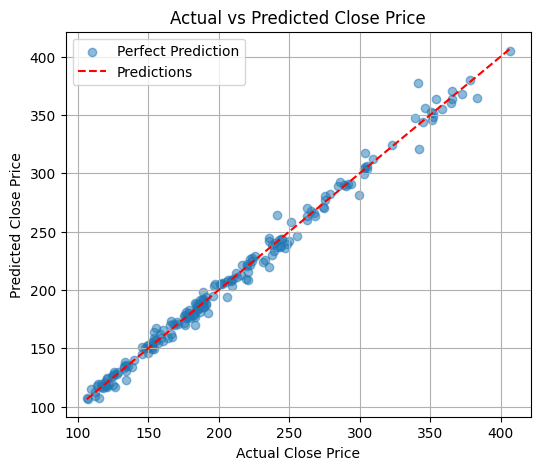

In [44]:
# Model Prediction Accuracy - Scatter Plot

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.legend(["Perfect Prediction", "Predictions"])
plt.grid(True)
plt.show()

C:\Users\Nihar Patel\AppData\Local\Temp\ipykernel_16372\3135010058.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Nihar Patel\AppData\Local\Temp\ipykernel_16372\3135010058.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.savefig("LinePlot.png")
C:\Python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


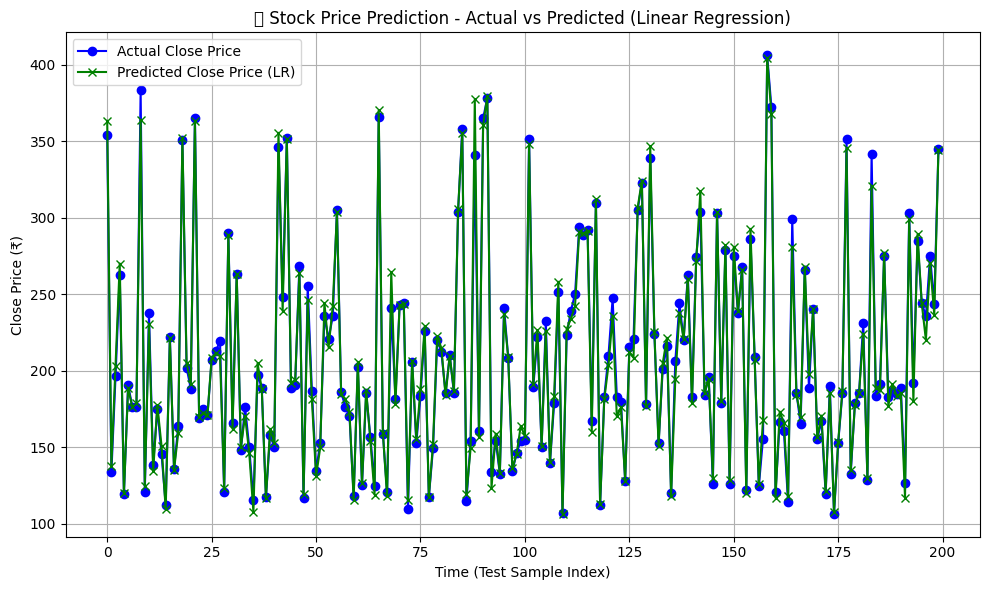

R² Score: 0.992394944541157
MSE: 37.65423378665498


In [45]:
# Actual vs Predicted Closing Prices (Line Plot)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close Price', marker='o', color='blue')
plt.plot(y_pred_lr, label='Predicted Close Price (LR)', marker='x', color='green')
plt.title("📈 Stock Price Prediction - Actual vs Predicted (Linear Regression)")
plt.xlabel("Time (Test Sample Index)")
plt.ylabel("Close Price (₹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("LinePlot.png")
plt.show()

# Print metrics
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))

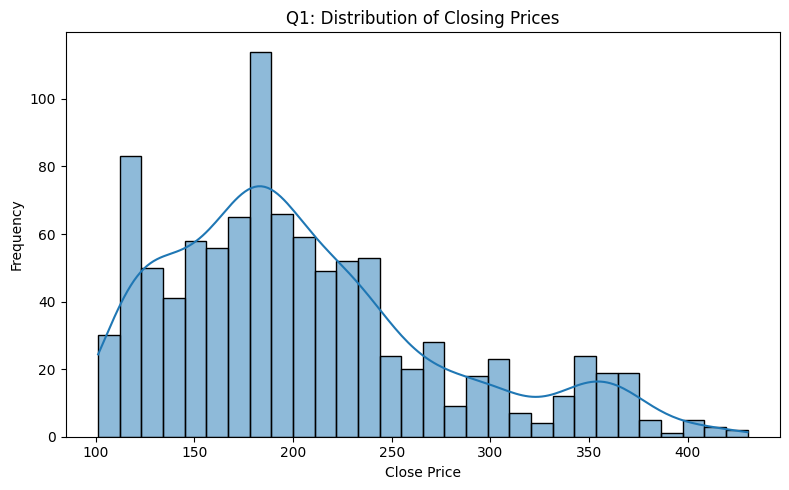

In [46]:
# Distribution of Closing Prices

plt.figure(figsize=(8, 5))
sns.histplot(sp["Close"], bins=30, kde=True)
plt.title("Q1: Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()